In [1]:
import pandas as pd
import numpy as np
import mysql.connector

# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="sunDay01@new",
    database=" user90data"
)
cursor = conn.cursor()

# Function to fetch data from MySQL and create DataFrame
def fetch_data_to_dataframe(table_name):
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql(query, conn)
    return df

# List of table names
table_names = [
    "SupplyDemand"
]

# Dictionary to store DataFrames
dataframes = {}

# Fetch data and create DataFrames for each table
for table_name in table_names:
    dataframes[table_name] = fetch_data_to_dataframe(table_name)

# Close the database connection
conn.close()


C:\Users\SIMRAN\AppData\Local\Temp\ipykernel_25544\2303210218.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [2]:
dataframes['SupplyDemand']

,UserCount,Timestamp,penniPrice
0,652,2023-01-15 16:36:28,491
1,987,2023-01-14 20:37:19,348
2,356,2023-01-23 01:21:20,607
3,833,2023-01-11 07:39:19,219
4,64,2023-01-20 23:49:19,137
5,687,2023-01-01 19:04:07,69
6,266,2023-01-04 18:17:56,827
7,759,2023-01-10 13:03:56,310
8,599,2023-01-02 23:10:46,528
9,447,2023-01-20 13:35:23,917


In [3]:
def droper(data_frames, table_name, col_arr):
    data_frames[table_name] = data_frames[table_name].drop(columns=col_arr)


In [4]:
# Define the columns to drop
columns_to_drop = ['Timestamp']

# Specify the name of the DataFrame in the 'dataframes' dictionary
table_update = 'SupplyDemand'

# Call the function to drop columns
droper(dataframes, table_update, columns_to_drop)
dataframes["SupplyDemand"].sample(10)

,UserCount,penniPrice
31,661,44
45,671,661
16,362,670
0,652,491
7,759,310
4,64,137
32,406,268
21,205,989
26,638,988
12,438,470


In [6]:
data=dataframes

In [5]:
from sklearn.preprocessing import StandardScaler

def numerical_preprocessing(data_frames, table_name, columns):
    if table_name in data_frames:
        scaler = StandardScaler()
        data_frames[table_name][columns] = scaler.fit_transform(data_frames[table_name][columns])
    else:
        print(f"Table '{table_name}' not found in the data_frames dictionary.")

# Assuming 'dataframes' is your dictionary of DataFrames
numerical_preprocessing(dataframes, "SupplyDemand", ['UserCount','penniPrice'])
dataframes['SupplyDemand']

,UserCount,penniPrice
0,0.561556,0.140958
1,1.836264,-0.342888
2,-0.564753,0.533449
3,1.250279,-0.779365
4,-1.675841,-1.056816
5,0.694735,-1.286897
6,-0.907211,1.277829
7,0.968702,-0.471463
8,0.359886,0.266149
9,-0.218489,1.582348


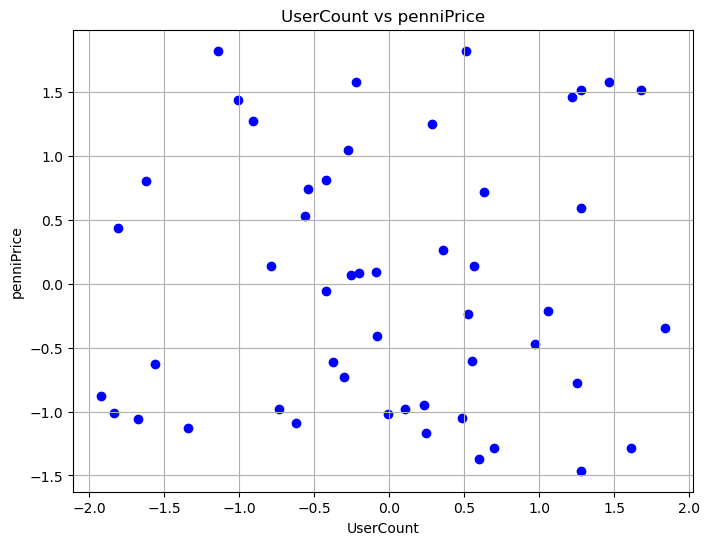

In [12]:
import matplotlib.pyplot as plt
df=dataframes['SupplyDemand']
plt.figure(figsize=(8, 6))
plt.scatter(df['UserCount'], df['penniPrice'], color='blue')
plt.title('UserCount vs penniPrice')
plt.xlabel('UserCount')
plt.ylabel('penniPrice')
plt.grid(True)
plt.show()

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
data = df

# Separate features and target variable
X = data[['UserCount']]  # Features
y = data['penniPrice']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.1)

# Evaluate the model
train_loss = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Train Loss:', train_loss)
print('Test Loss:', test_loss)



Epoch 1/100
2/2 [==============================] - 1s 195ms/step - loss: 0.9619 - val_loss: 1.0244
Epoch 2/100
2/2 [==============================] - 0s 26ms/step - loss: 0.9570 - val_loss: 1.0059
Epoch 3/100
2/2 [==============================] - 0s 28ms/step - loss: 0.9561 - val_loss: 1.0304
Epoch 4/100
2/2 [==============================] - 0s 33ms/step - loss: 0.9536 - val_loss: 1.0563
Epoch 5/100
2/2 [==============================] - 0s 28ms/step - loss: 0.9508 - val_loss: 1.0874
Epoch 6/100
2/2 [==============================] - 0s 26ms/step - loss: 0.9483 - val_loss: 1.1272
Epoch 7/100
2/2 [==============================] - 0s 34ms/step - loss: 0.9492 - val_loss: 1.1650
Epoch 8/100
2/2 [==============================] - 0s 26ms/step - loss: 0.9475 - val_loss: 1.1934
Epoch 9/100
2/2 [==============================] - 0s 29ms/step - loss: 0.9469 - val_loss: 1.2231
Epoch 10/100
2/2 [==============================] - 0s 31ms/step - loss: 0.9476 - val_loss: 1.2467
Epoch 11/100
2/2 [

Epoch 84/100
2/2 [==============================] - 0s 26ms/step - loss: 0.7972 - val_loss: 1.1734
Epoch 85/100
2/2 [==============================] - 0s 30ms/step - loss: 0.7948 - val_loss: 1.1405
Epoch 86/100
2/2 [==============================] - 0s 27ms/step - loss: 0.7940 - val_loss: 1.1056
Epoch 87/100
2/2 [==============================] - 0s 28ms/step - loss: 0.7942 - val_loss: 1.0851
Epoch 88/100
2/2 [==============================] - 0s 31ms/step - loss: 0.7930 - val_loss: 1.0698
Epoch 89/100
2/2 [==============================] - 0s 36ms/step - loss: 0.7963 - val_loss: 1.0579
Epoch 90/100
2/2 [==============================] - 0s 31ms/step - loss: 0.7961 - val_loss: 1.0460
Epoch 91/100
2/2 [==============================] - 0s 31ms/step - loss: 0.7993 - val_loss: 1.0309
Epoch 92/100
2/2 [==============================] - 0s 29ms/step - loss: 0.7995 - val_loss: 1.0150
Epoch 93/100
2/2 [==============================] - 0s 29ms/step - loss: 0.7989 - val_loss: 0.9859
Epoch 94/1

In [16]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
app = FastAPI()
# Define request body schema
class Item(BaseModel):
    user_count: float

# Prediction endpoint
@app.post("/predict/")
async def predict_price(item: Item):
    user_count = item.user_count
    scaled_user_count = scaler.transform([[user_count]])
    prediction = model.predict(scaled_user_count)
    return {"predicted_price": prediction[0][0]}

# Evaluation endpoint
@app.get("/evaluate/")
async def evaluate_model():
    train_loss = model.evaluate(X_train_scaled, y_train, verbose=0)
    test_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
    return {"train_loss": train_loss, "test_loss": test_loss}